# Natural Language Toolkit Basics

Initial steps in Natural Language Toolkit (NLTK) https://www.nltk.org

NLTK is a very useful package for natural language processing. A short and simple example text ist used here to show some basic functionalities of NLTK, including tokenization, stemming, tagging and vocabulary analysis.

Required packages and installation:

     conda install nltk -c conda-forge
 
     Once NLTK is installed, download Wordnet using the Python shell:
     
         #python
         import nltk
         nltk.download('wordnet')

#### Check python version and import required modules

In [1]:
# Check python version for reproducibility
import sys
print("Python version = ", sys.version)

Python version =  3.9.5 (default, Jun  4 2021, 12:28:51) 
[GCC 7.5.0]


In [2]:
# import required packages
import nltk

## 1.) Tokenize text

Text can be split into words or sentences using different tokenization functions and inclusion/exclusion patterns.

We start by defining an example text which will be used for all the functions below.

In [3]:
# Example text
ex_txt = """1 raven, 2 ravens, 3 ravens, 4 ravens. Ravens have spread across the country. They move like a dark cloud in the dark sky."""

In [4]:
print(ex_txt)

1 raven, 2 ravens, 3 ravens, 4 ravens. Ravens have spread across the country. They move like a dark cloud in the dark sky.


### 1.1 Tokenize into words

Most basic tokenization yielding words and punctuation of the text 

In [5]:
# tokenize
w_tokens = nltk.word_tokenize(ex_txt)

In [6]:
# print all tokens
print(w_tokens)

['1', 'raven', ',', '2', 'ravens', ',', '3', 'ravens', ',', '4', 'ravens', '.', 'Ravens', 'have', 'spread', 'across', 'the', 'country', '.', 'They', 'move', 'like', 'a', 'dark', 'cloud', 'in', 'the', 'dark', 'sky', '.']


In [7]:
# print token at specific position
print(w_tokens[13])

have


### 1.2 Tokenize into words excluding or including specific patterns

The regexp tokenizer can be used to include or exclude specific patterns, e.g. punctuation, digits e.t.c.

##### Example a): define pattern for excluding punctuation

In [8]:
# define pattern:
pat = r'\w+'

In [9]:
# initialize tokenizer with pattern
r_tokenizer = nltk.RegexpTokenizer(pat)
# tokenize with specified pattern
r1_tokens = r_tokenizer.tokenize(ex_txt)

In [10]:
print(r1_tokens)

['1', 'raven', '2', 'ravens', '3', 'ravens', '4', 'ravens', 'Ravens', 'have', 'spread', 'across', 'the', 'country', 'They', 'move', 'like', 'a', 'dark', 'cloud', 'in', 'the', 'dark', 'sky']


###### Example b): define pattern for finding digits

In [11]:
# define pattern
pat = r'\d+'

In [12]:
# initialize tokenizer with pattern
r_tokenizer = nltk.RegexpTokenizer(pat)
# tokenize with specified pattern
r2_tokens = r_tokenizer.tokenize(ex_txt)

In [13]:
print(r2_tokens)

['1', '2', '3', '4']


### 1.3 Tokenize into sentences

Split the text into its sentences

In [14]:
# tokenize 
s_tokens = nltk.sent_tokenize(ex_txt)

In [15]:
print(s_tokens)

['1 raven, 2 ravens, 3 ravens, 4 ravens.', 'Ravens have spread across the country.', 'They move like a dark cloud in the dark sky.']


## 2.) Lemmatization and stemming

Lemmatizations and stemming are processes of linguistic normalization.

#### Stemming: reducing words to their root word

In [16]:
# define stemmer
ps = nltk.stem.PorterStemmer()

In [17]:
# stem each word in the tokenized text "r1_tokens" defined in Section 1.2
stemmed_words=[]
for w in r1_tokens:
    stemmed_words.append(ps.stem(w))

In [18]:
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['1', 'raven', '2', 'raven', '3', 'raven', '4', 'raven', 'raven', 'have', 'spread', 'across', 'the', 'countri', 'they', 'move', 'like', 'a', 'dark', 'cloud', 'in', 'the', 'dark', 'sky']


#### Lemmatization: reduce words to linguistically correct lemmas with the use of vocabulary and morphological analysis
(More sophisticated than stemming)

In [19]:
lem = nltk.stem.wordnet.WordNetLemmatizer()

In [20]:
stem = nltk.stem.porter.PorterStemmer()

In [21]:
# simple comparison of stemming and lemmatization with one word
word = "flying"
print("Stemmed Word:",stem.stem(word))
print("Lemmatized Word:",lem.lemmatize(word,"v"))

Stemmed Word: fli
Lemmatized Word: fly


In [22]:
# Example for each word in the tokenized text "r1_tokens" defined in Section 1.2
lem_words=[]
for w in r1_tokens:
    lem_words.append(lem.lemmatize(w,"v"))

In [23]:
print("Lemmatized sentence:",lem_words)

Lemmatized sentence: ['1', 'raven', '2', 'raven', '3', 'raven', '4', 'raven', 'Ravens', 'have', 'spread', 'across', 'the', 'country', 'They', 'move', 'like', 'a', 'dark', 'cloud', 'in', 'the', 'dark', 'sky']


## 3.) Tag token positions

Mark the words in the text for a particular part of a speech based on definition and context. Detailed explanation of tag abbreviations: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [24]:
# taggin ght tokenized sentence from Section 1.1
tagged = nltk.pos_tag(w_tokens)

In [25]:
print(tagged)

[('1', 'CD'), ('raven', 'NN'), (',', ','), ('2', 'CD'), ('ravens', 'NNS'), (',', ','), ('3', 'CD'), ('ravens', 'NNS'), (',', ','), ('4', 'CD'), ('ravens', 'NNS'), ('.', '.'), ('Ravens', 'NNS'), ('have', 'VBP'), ('spread', 'VBN'), ('across', 'IN'), ('the', 'DT'), ('country', 'NN'), ('.', '.'), ('They', 'PRP'), ('move', 'VBP'), ('like', 'IN'), ('a', 'DT'), ('dark', 'JJ'), ('cloud', 'NN'), ('in', 'IN'), ('the', 'DT'), ('dark', 'NN'), ('sky', 'NN'), ('.', '.')]


In [26]:
tagged[5:15]

[(',', ','),
 ('3', 'CD'),
 ('ravens', 'NNS'),
 (',', ','),
 ('4', 'CD'),
 ('ravens', 'NNS'),
 ('.', '.'),
 ('Ravens', 'NNS'),
 ('have', 'VBP'),
 ('spread', 'VBN')]

In [27]:
entities = nltk.chunk.ne_chunk(tagged[0:10])

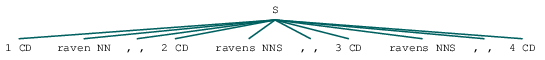

In [28]:
entities

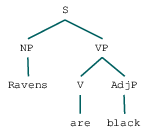

In [29]:
# nicer tree drawing possible with formatting
nltk.Tree.fromstring('(S (NP Ravens) (VP (V are) (AdjP black)))')

## 4.) Analyze vocabulary

NLTK can be used to analyze the vocabulary of texts. Some simple options include finding concordance in the text, counting word occurrences and calculating word frequencies. 

Example text: lemmatized example "lem_words" defined above in Section 2.

In [30]:
# Create text object "lem_text" here using "lem_words"
lem_text = nltk.Text(lem_words)

#### Text concordance

In [31]:
# Analyze and print the concordances in the text
lem_text.concordance('raven')

Displaying 4 of 4 matches:
1 raven 2 raven 3 raven 4 raven Ravens have 
1 raven 2 raven 3 raven 4 raven Ravens have spread a
1 raven 2 raven 3 raven 4 raven Ravens have spread across th
1 raven 2 raven 3 raven 4 raven Ravens have spread across the countr


#### Count the occurrences of specific words

In [32]:
# example word: 'ravens'
ex_word = 'raven'
print("Number of word occcurrences = ", lem_text.count(ex_word))

Number of word occcurrences =  4


In [33]:
# example word: 'the'
ex_word = 'the'
print("Number of word occcurrences = ", lem_text.count(ex_word))

Number of word occcurrences =  2


#### Analyze vocabulary and get word counts and frequencies

In [34]:
# initialize vocabulary object for r1_text
vocabulary = lem_text.vocab()

In [35]:
# print all items in the vocabulary (i.e. all words and their frequencies)
print(vocabulary.items())

dict_items([('1', 1), ('raven', 4), ('2', 1), ('3', 1), ('4', 1), ('Ravens', 1), ('have', 1), ('spread', 1), ('across', 1), ('the', 2), ('country', 1), ('They', 1), ('move', 1), ('like', 1), ('a', 1), ('dark', 2), ('cloud', 1), ('in', 1), ('sky', 1)])


In [36]:
# get the frequency of the word "the"
vocabulary.freq('the')

0.08333333333333333

In [37]:
# get the occurrence of the word "the"
vocabulary['the']

2

In [38]:
# find out the most common word of the text
print("Most common word =", vocabulary.max())

Most common word = raven


In [39]:
# sort the vocabulary according to the word occurrences
vocabulary.most_common()

[('raven', 4),
 ('the', 2),
 ('dark', 2),
 ('1', 1),
 ('2', 1),
 ('3', 1),
 ('4', 1),
 ('Ravens', 1),
 ('have', 1),
 ('spread', 1),
 ('across', 1),
 ('country', 1),
 ('They', 1),
 ('move', 1),
 ('like', 1),
 ('a', 1),
 ('cloud', 1),
 ('in', 1),
 ('sky', 1)]